In the limit of shallow water
\begin{equation}
    |k|h \ll 1 \implies \tanh(kh) \approx kh
\end{equation}
and negligible surface tension
\begin{equation}
    \rho^{-1}\gamma|k|^3 \ll g|k|,
\end{equation}
the dispersion relation can be approximated by the dispersionless
\begin{equation}
    \omega^2 = c_0^2k^2
\end{equation}
with $c_0 = \sqrt{gh}$. The Fourier integral can then be evaluated analytically,
\begin{align}
    F(x, t)
    &= \int_{-\infty}^\infty A(k)\cos(\omega(k)t) e^{ikx} \,dk, \\
    &= \int_{-\infty}^\infty A(k)\cos(c_0kt) e^{ikx} \,dk, \\
    &= \frac{1}{2}\int_{-\infty}^\infty A(k)(e^{ic_0kt} + e^{-ic_0kt}) e^{ikx} \,dk, \\
    &= \frac{1}{2}\int_{-\infty}^\infty A(k)(e^{ik(c_0t + x)} + e^{ik(-c_0t + x)}) \,dk, \\
\end{align}

If we set t=0 in the general solution, then we get
\begin{equation}
    F(x, 0) = \int_{-\infty}^\infty A(k) e^{ikx} \,dk,
\end{equation}
which is the inverse Fourier transform of $A(k)$. The term
\begin{equation}
    \int_{-\infty}^\infty A(k) e^{ik(x - c_0t)} \,dk
\end{equation}
is the exact form of the inverse Fourier Transform, but with x replaced by $(x - c_0t)$. Therefore, this integral is equal to $F(x - c_0t, 0)$. Similarly, the term
\begin{equation}
    \int_{-\infty}^\infty A(k) e^{ik(x + c_0t)} \,dk
\end{equation}
is equal to $F(x + c_0t, 0)$. We now arrive at the d'Alembert's solution for the one-dimensional wave equation
\begin{equation}
    F(x, t) = \frac{1}{2}(F(x - c_0t, 0) + F(x + c_0t, 0)).
\end{equation}

The initial shape $F(x, 0)$ is split into two identical halves which travel in opposite directions at constant speed $c_0$ without changing its shape.

Root Mean Square Error between numerical and analytical solutions at t=10.0s: 3.1056e-02


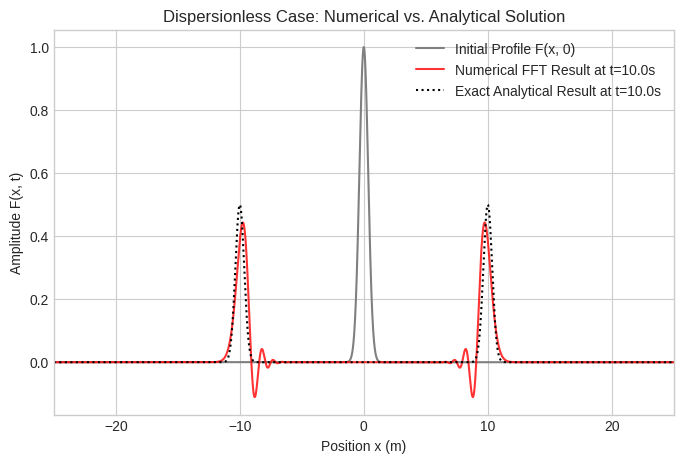

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def solve_wave_dispersion(t, g, rho, gamma, h, sigma, k0, N, L):
    '''
    Computes the profile of a dispersive wave packet at a given time t
    using the Fast Fourier Transform method.
    '''
    dx = L / N
    x = np.linspace(-L / 2, L / 2, N, endpoint=False)
    k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
    F_x_0 = np.exp(-x**2 / sigma**2) * np.cos(k0 * x)
    A_k_0 = np.fft.fft(F_x_0)
    omega_sq = (g * np.abs(k) + (gamma / rho) * np.abs(k)**3) * np.tanh(np.abs(k) * h)
    omega = np.sqrt(omega_sq)
    time_evolution_factor = np.cos(omega * t)
    A_k_t = A_k_0 * time_evolution_factor
    F_x_t = np.real(np.fft.ifft(A_k_t))
    return x, F_x_t, F_x_0

def analytical_solution_dispersionless(x, t, c0, sigma):
    '''
    Calculates the exact analytical solution for the dispersionless case.
    F(x, t) = 0.5 * [F(x - c0*t, 0) + F(x + c0*t, 0)]
    '''
    initial_profile_right = 0.5 * np.exp(-(x - c0 * t)**2 / sigma**2)
    initial_profile_left = 0.5 * np.exp(-(x + c0 * t)**2 / sigma**2)
    return initial_profile_right + initial_profile_left

def calculate_rmse(numerical, analytical):
    '''
    Calculates the root nean square error between two signals.
    '''
    return np.sqrt(np.mean((numerical - analytical)**2))


c0 = 1.0                # Wave speed (m/s)
g = 9.81
params = {
    'g': g,             # Gravitational acceleration (m/s^2)
    'rho': 1000,        # Not relevant when gamma is 0
    'gamma': 0.0,       # Negligible surface tension as per instructions
    'h': c0**2 / g,     # Implied shallow water depth, h ≈ 0.102 m
    'sigma': 0.5,       # (m)
    'k0': 0.0,          # (m^-1)
    'N': 2**16,         # Increased resolution for higher accuracy
    'L': 50.0           # Large domain to prevent wave wrap-around
}

time_to_solve = 10.0  # seconds
x_grid, numerical_result, initial_profile = solve_wave_dispersion(time_to_solve, **params)
analytical_result = analytical_solution_dispersionless(x_grid, time_to_solve, c0, params['sigma'])

rmse = calculate_rmse(numerical_result, analytical_result)
print(f"Root Mean Square Error between numerical and analytical solutions at t={time_to_solve}s: {rmse:.4e}")

plt.figure(figsize=(8, 5))
plt.plot(x_grid, initial_profile, label='Initial Profile F(x, 0)', color='gray')
plt.plot(x_grid, numerical_result, label=f'Numerical FFT Result at t={time_to_solve}s', color='red', alpha=0.8)
plt.plot(x_grid, analytical_result, label=f'Exact Analytical Result at t={time_to_solve}s', color='black', linestyle=':')
plt.title('Dispersionless Case: Numerical vs. Analytical Solution')
plt.xlabel('Position x (m)')
plt.ylabel('Amplitude F(x, t)')
plt.legend()
plt.grid(True)
plt.xlim(-25, 25)
plt.show()

The analytical solution shows two wave packets moving at a speed of $c_0 = 1 \mbox{ m/s}$. After $t = 10 \mbox{ s}$, their centers will be at $x = \pm 10 \mbox{ m}$. The initial packet width is determined by $\sigma = 0.5 \mbox{ m}$. To prevent the packets from wrapping around the periodic boundary and interfering with themselves, the domain $L$ must be substantially larger than the $20 \mbox{ m}$ separation.

The spatial resolution $\Delta x = L/N$ must be small enough or grid $N$ must be fine enough to accurately resolve the shape of the Gaussian packets.

We neglect surface tension by setting $\gamma = 0$. This is physically justified. The dominant wavenumbers $|k|$ in the initial pulse are roughly $1/\sigma = 2 \mbox{ m$^{-1}$}$. For water, the surface tension term $\gamma k^2/\rho \approx 3 \times 10^{-4}$ is significantly smaller than the gravity term $g = 9.81$.

The shallow water condition is seen by noting the small $h \approx 0.1 \mbox{ m}$ and the dominant $|k| \approx 2 \mbox{ m${^-1}$}$, Their product is $|k|h \approx 0.2$ which is not significantly less than $1$ and $\tanh(0.2) \approx 0.197$, giving a relative error of around $1.5\%$. This error is reasonable small but the dispersive effects are not entirely zero, which becomes more magnified for longer time scales.